In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [3]:
train = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
display(train.info())
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

None

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


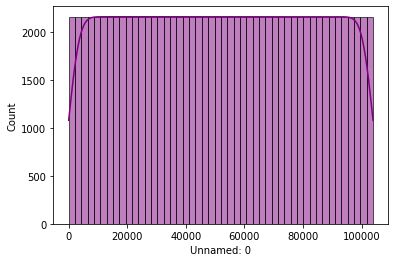

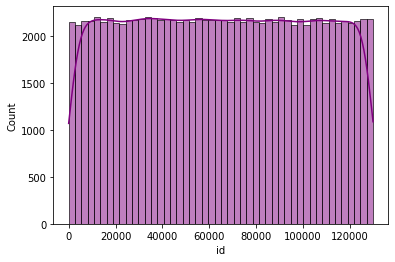

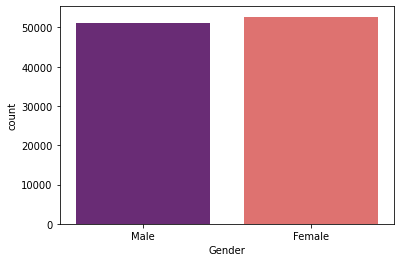

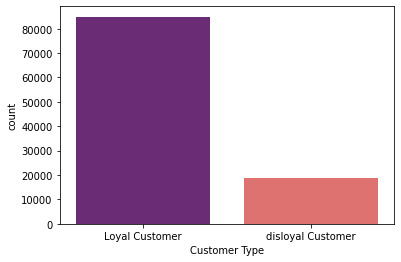

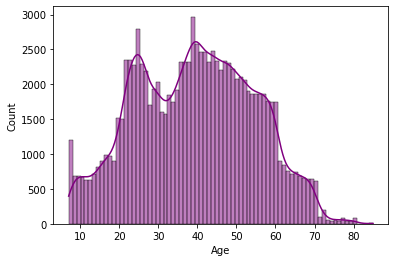

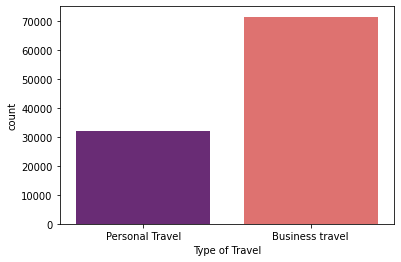

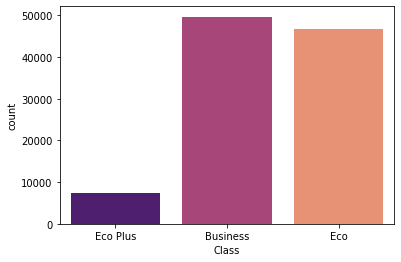

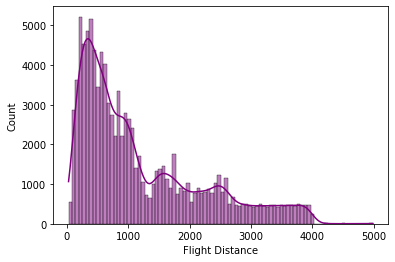

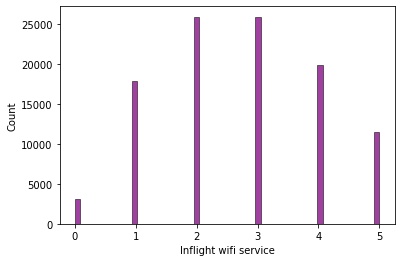

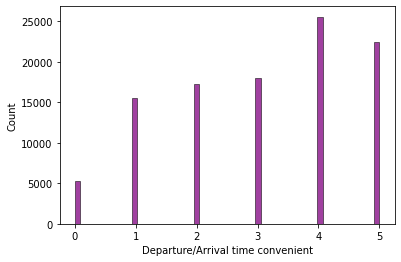

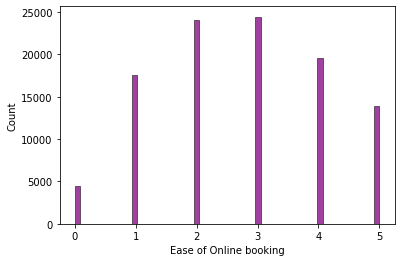

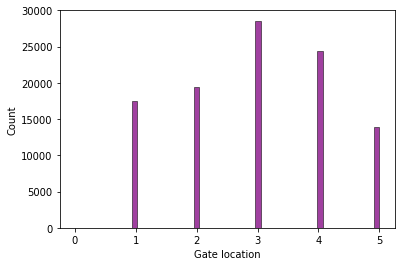

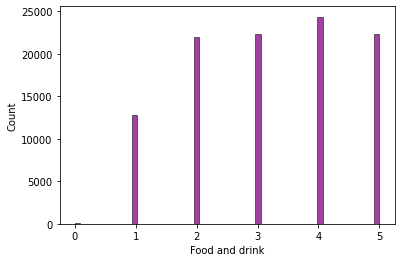

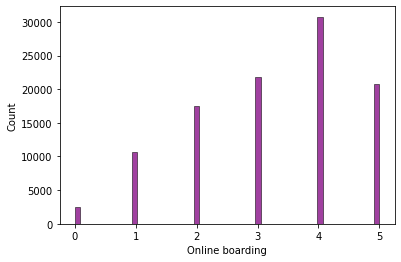

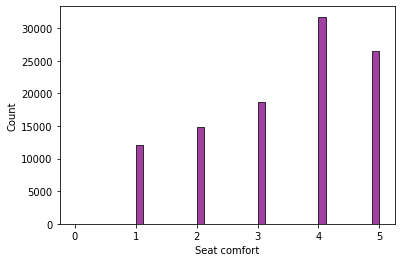

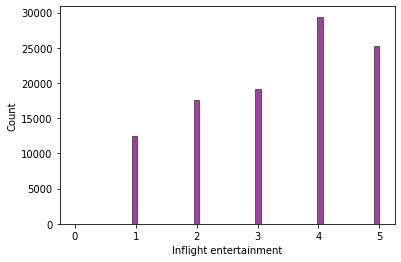

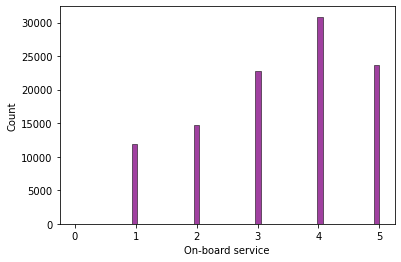

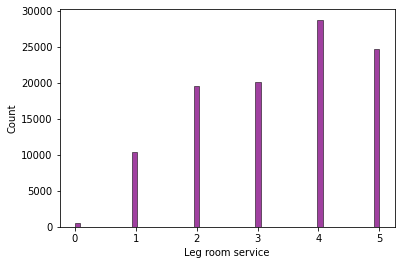

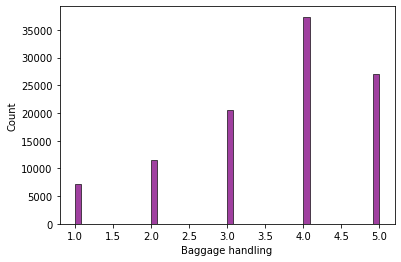

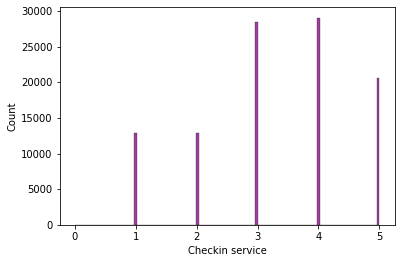

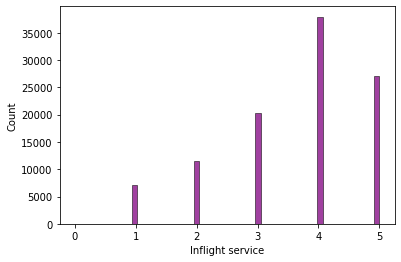

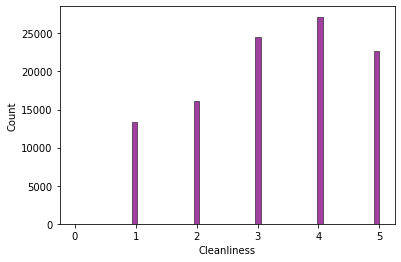

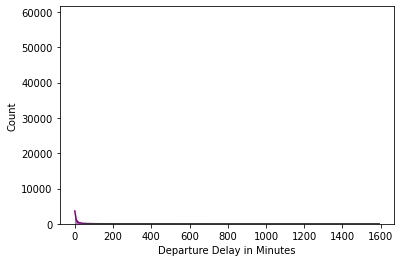

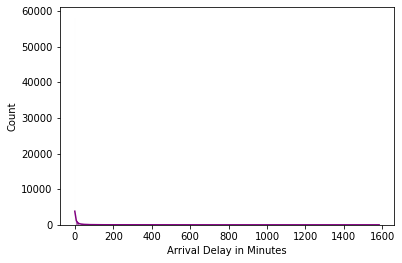

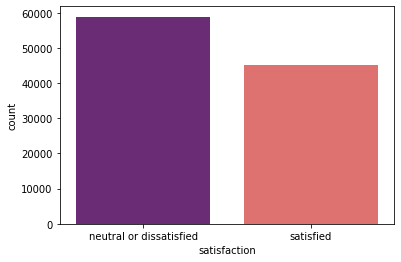

In [5]:
#Univariate analysis
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
for c in train.columns:
    if train[c].dtype in ['object','bool']: #categorical column
        plt.figure()
        sns.countplot(train[c],palette='magma')
        plt.show()
    else: #numerical column
        plt.figure()
        sns.histplot(train[c],kde=(len(train[c].unique())>10),color='purple')
        plt.show()

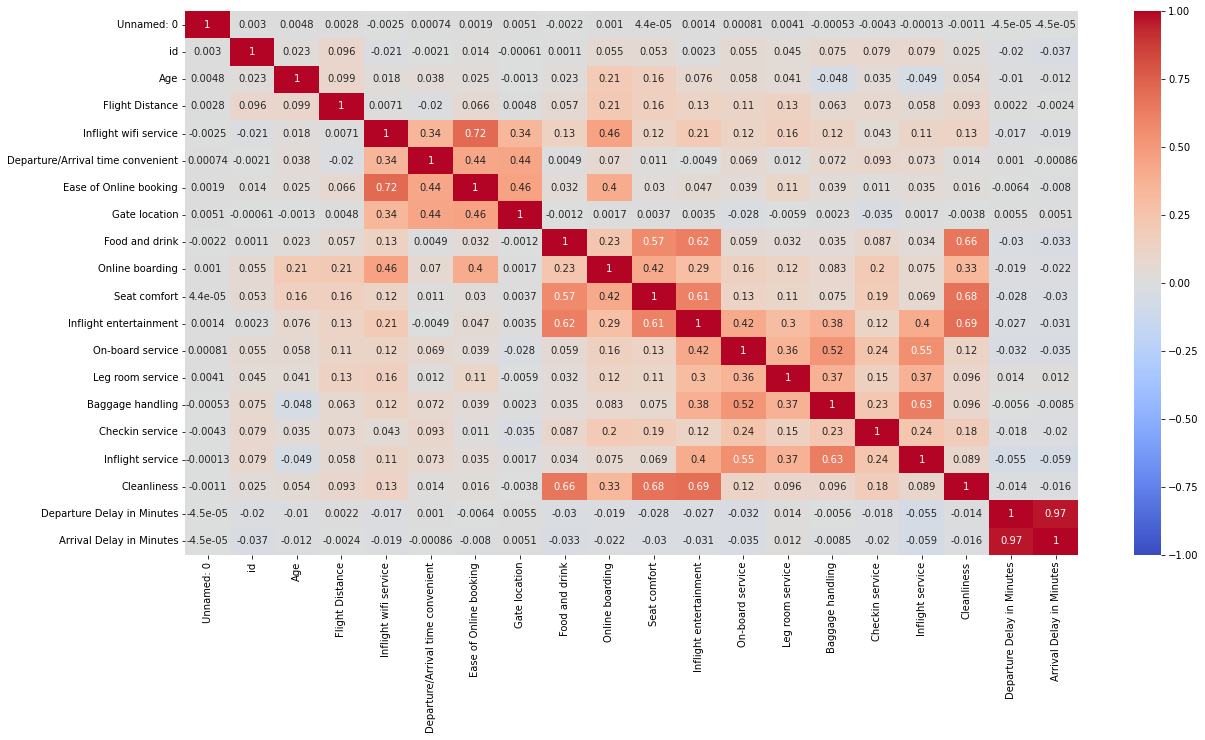

In [6]:
#sns.pairplot(train, hue=train.columns[-1],palette='viridis') #too many variables to be very helpful
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

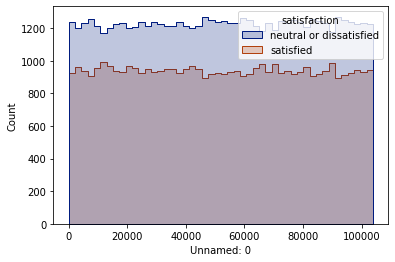

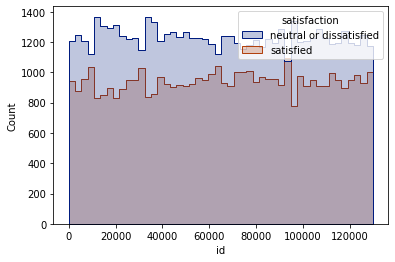

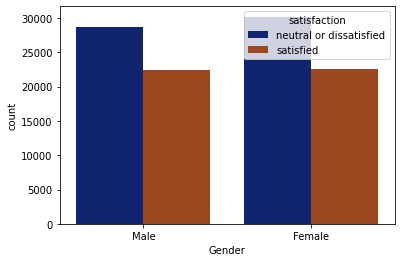

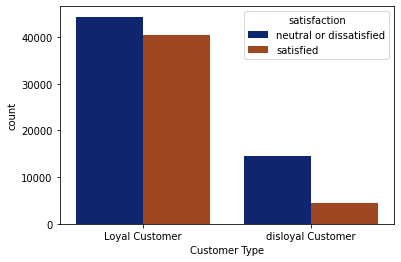

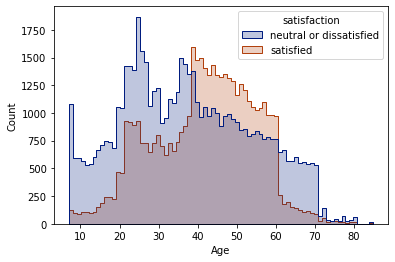

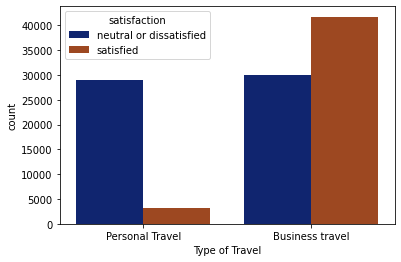

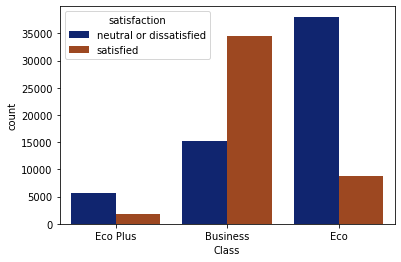

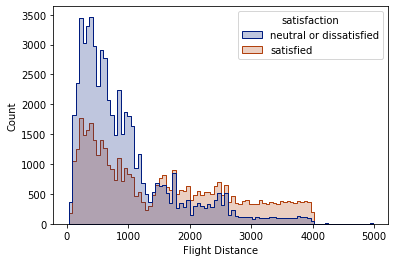

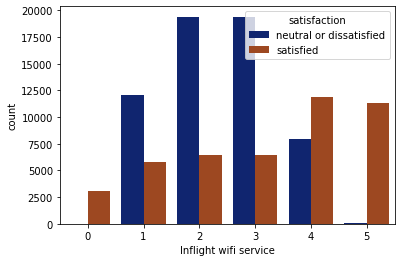

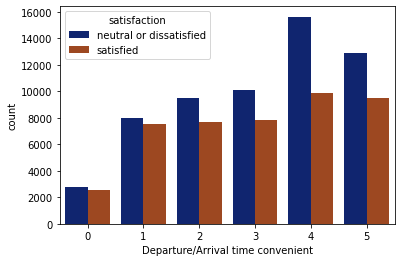

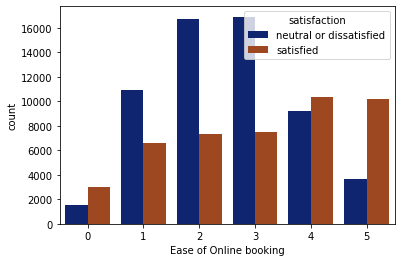

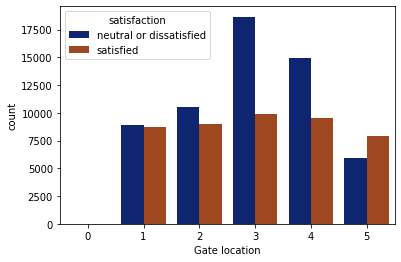

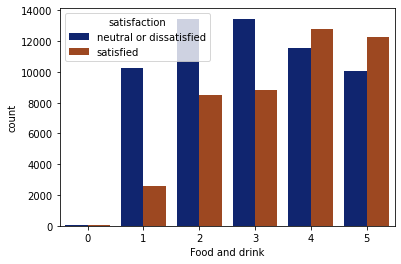

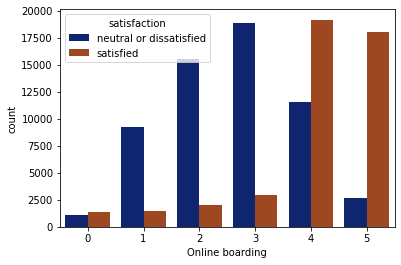

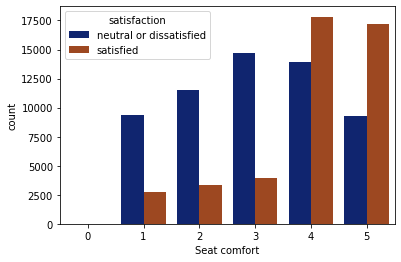

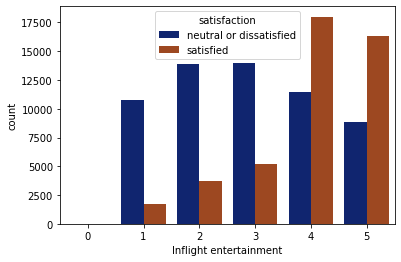

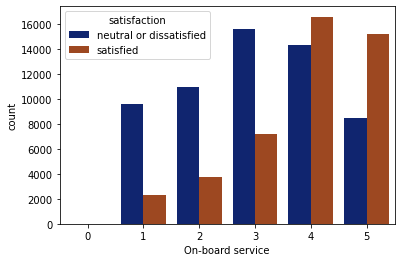

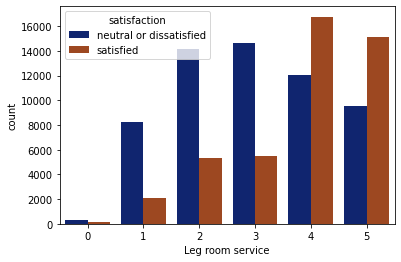

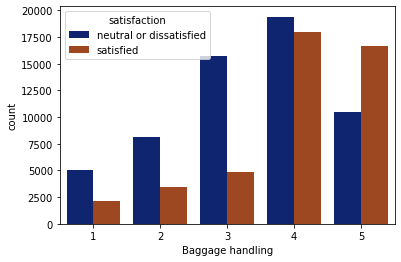

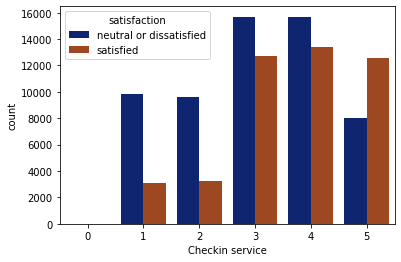

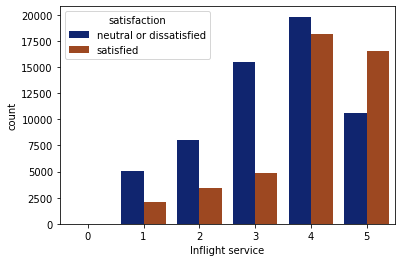

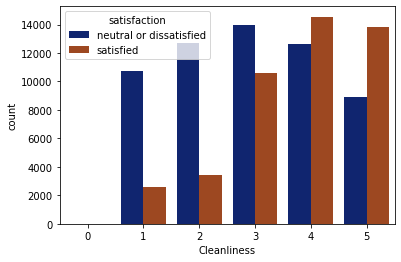

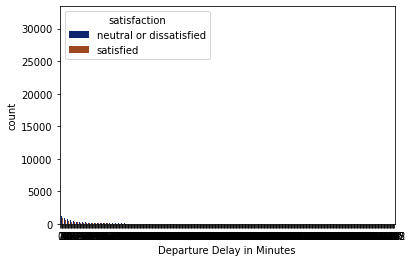

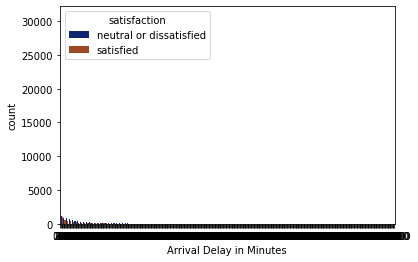

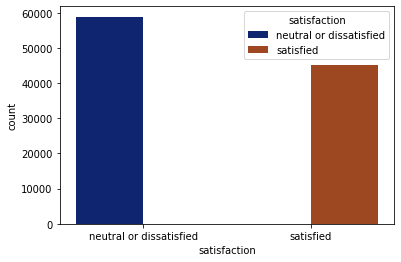

In [4]:
#Bivariate analysis
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
count = 0
for c in train.columns:
    if (train[c].dtype in ['object','bool']) or (count>=4): #categorical column
        plt.figure()
        sns.countplot(data=train,x=c,hue=train.columns[-1],palette='dark')
        plt.show()
    else: #numerical column
        count+=1
        plt.figure()
        sns.histplot(data=train,x=c,hue=train.columns[-1],element='step',palette='dark')
        plt.show()

In [8]:
import warnings #preprocessing
warnings.filterwarnings("ignore")
train = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
test = pd.read_csv("../input/airline-passenger-satisfaction/test.csv")
import seaborn as sns
import matplotlib.pyplot as plt
ytrain=train['satisfaction']
ytest=test['satisfaction']
train.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)
test.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)
#plt.figure(figsize=(20, 10))
#sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1, cmap="icefire")
#plt.show()
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [9]:
display(train.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [10]:
logs=['Departure Delay in Minutes','Arrival Delay in Minutes'] #log transform due to distribution shape
for l in logs:
    train[l] = np.log(1+train[l])
    test[l] = np.log(1+test[l])

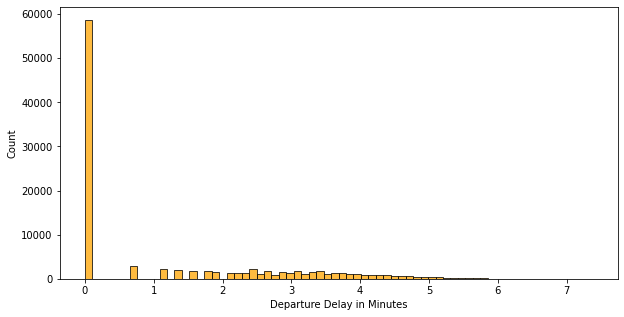

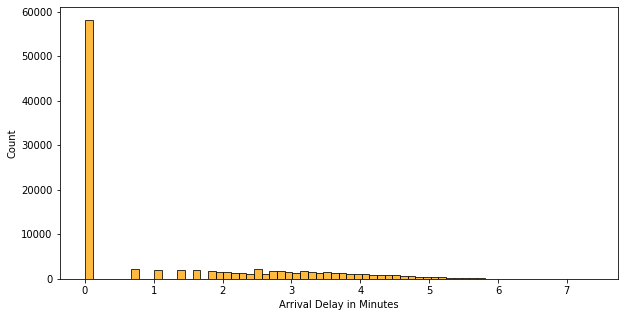

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
for l in logs:
    plt.figure(figsize=(10,5))
    sns.histplot(train[l],color='orange')
    plt.show()

In [12]:
train=pd.get_dummies(train,drop_first=True) #encoding categorical variables
test =pd.get_dummies(test,drop_first=True)
display(train.head())
display(test.head())

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,3.258097,2.944439,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,0.693147,1.945910,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0.000000,0.000000,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,2.484907,2.302585,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0.000000,0.000000,1,0,0,0,0


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,2,5,5,3.931826,3.806662,0,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,3,4,5,0.000000,0.000000,0,0,0,0,0
2,20,192,2,0,2,4,2,2,2,2,...,2,2,2,0.000000,0.000000,1,1,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,3,1,4,0.000000,1.945910,1,0,0,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,4,2,4,0.000000,3.044522,0,0,0,1,0


In [13]:
ytrain=(ytrain=='satisfied').astype(int) #encoding ys
ytest=(ytest=='satisfied').astype(int)

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

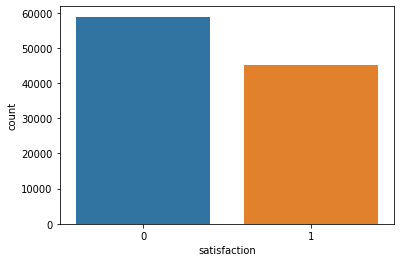

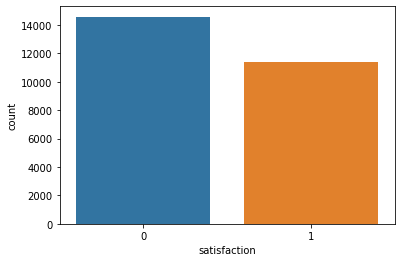

In [14]:
sns.countplot(ytrain)
plt.figure()
sns.countplot(ytest)

In [15]:
display(train.info()) #Arrival Delay in minutes is missing some values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight Distance                    103904 non-null  int64  
 2   Inflight wifi service              103904 non-null  int64  
 3   Departure/Arrival time convenient  103904 non-null  int64  
 4   Ease of Online booking             103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                25976 non-null  int64  
 1   Flight Distance                    25976 non-null  int64  
 2   Inflight wifi service              25976 non-null  int64  
 3   Departure/Arrival time convenient  25976 non-null  int64  
 4   Ease of Online booking             25976 non-null  int64  
 5   Gate location                      25976 non-null  int64  
 6   Food and drink                     25976 non-null  int64  
 7   Online boarding                    25976 non-null  int64  
 8   Seat comfort                       25976 non-null  int64  
 9   Inflight entertainment             25976 non-null  int64  
 10  On-board service                   25976 non-null  int64  
 11  Leg room service                   25976 non-null  int

In [16]:
#get rid of arrival delay due to extremely high correlation with departure delay
train.drop('Arrival Delay in Minutes',axis=1,inplace=True)
test.drop('Arrival Delay in Minutes',axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight Distance                    103904 non-null  int64  
 2   Inflight wifi service              103904 non-null  int64  
 3   Departure/Arrival time convenient  103904 non-null  int64  
 4   Ease of Online booking             103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

In [5]:
#condensed preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
train = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
test = pd.read_csv("../input/airline-passenger-satisfaction/test.csv")
import seaborn as sns
import matplotlib.pyplot as plt
ytrain=train['satisfaction']
ytest=test['satisfaction']
train.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)
test.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)

logs=['Departure Delay in Minutes','Arrival Delay in Minutes'] #log transform due to distribution shape
for l in logs:
    train[l] = np.log(1+train[l])
    test[l] = np.log(1+test[l])
train=pd.get_dummies(train,drop_first=True) #encoding categorical variables
test =pd.get_dummies(test,drop_first=True)
ytrain=(ytrain=='satisfied').astype(int) #encoding ys
ytest=(ytest=='satisfied').astype(int)
train.drop('Arrival Delay in Minutes',axis=1,inplace=True)
test.drop('Arrival Delay in Minutes',axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
train = StandardScaler().fit_transform(train)
test = StandardScaler().fit_transform(test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
import random
random.seed(42)
names = [
    "LR",
    "KNN",
    "DTree",
    "RF",
    "ADA",
    "NB",
    "QDA",
]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

train = StandardScaler().fit_transform(train)
test = StandardScaler().fit_transform(test)
scores = []
for i,c in enumerate(classifiers):
    c.fit(train,ytrain)
    y_pred = c.predict(test)
    f=f1_score(ytest, y_pred)
    print([names[i],f])
    scores.append(f)

['LR', 0.8516424340333874]
['KNN', 0.9132869042742046]
['DTree', 0.9350410910998427]
['RF', 0.9571110120374497]
['ADA', 0.915191382278928]
['NB', 0.8355438866506723]
['QDA', 0.8273063396158356]


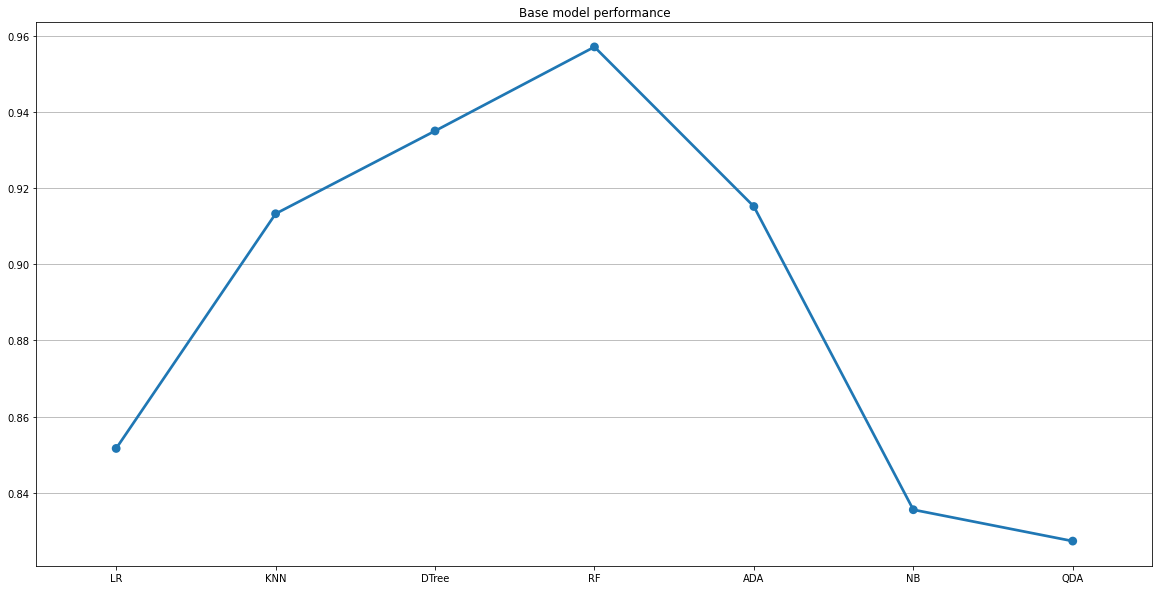

In [19]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title("Base model performance")
sns.pointplot(names, scores)
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
random.seed(42)
params = {
    'base_estimator': [DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier()],
    'n_estimators': [50,100,150],
    'learning_rate' : [0.5,1]
    
}
clf = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=params, scoring='f1',verbose=3)
clf.fit(train,ytrain)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.5, n_estimators=50;, score=0.943 total time=  11.4s
[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.5, n_estimators=50;, score=0.947 total time=  11.8s
[CV 3/5] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.5, n_estimators=50;, score=0.944 total time=  11.3s
[CV 4/5] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.5, n_estimators=50;, score=0.950 total time=  11.3s
[CV 5/5] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.5, n_estimators=50;, score=0.949 total time=  11.0s
[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.5, n_estimators=100;, score=0.946 total time=  22.4s
[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.5, n_estimators=100;, score=0.951 total time=  22.4s
[CV 3/

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=3),
                                            DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier()],
                         'learning_rate': [0.5, 1],
                         'n_estimators': [50, 100, 150]},
             scoring='f1', verbose=3)

In [21]:
clf.best_params_
#depth=5, lr=0.5, n=50, .952

{'base_estimator': DecisionTreeClassifier(max_depth=5),
 'learning_rate': 0.5,
 'n_estimators': 50}

In [ ]:
random.seed(42)
params = {
    'base_estimator': [RandomForestClassifier()],
    'n_estimators': [50,100,150,200,300,1000],
    'learning_rate' : [0.5,1,1.5]
}
grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=params, scoring='f1',verbose=3)
grid.fit(train,ytrain)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END base_estimator=RandomForestClassifier(), learning_rate=0.5, n_estimators=50;, score=0.953 total time=  11.0s
[CV 2/5] END base_estimator=RandomForestClassifier(), learning_rate=0.5, n_estimators=50;, score=0.954 total time=  10.9s
[CV 3/5] END base_estimator=RandomForestClassifier(), learning_rate=0.5, n_estimators=50;, score=0.954 total time=  11.7s
[CV 4/5] END base_estimator=RandomForestClassifier(), learning_rate=0.5, n_estimators=50;, score=0.957 total time=  23.5s
[CV 5/5] END base_estimator=RandomForestClassifier(), learning_rate=0.5, n_estimators=50;, score=0.956 total time=  10.8s
[CV 1/5] END base_estimator=RandomForestClassifier(), learning_rate=0.5, n_estimators=100;, score=0.955 total time=  10.8s
[CV 2/5] END base_estimator=RandomForestClassifier(), learning_rate=0.5, n_estimators=100;, score=0.956 total time=  22.1s
[CV 3/5] END base_estimator=RandomForestClassifier(), learning_rate=0.5, n_estimato

In [ ]:
grid.best_params_
#1.5,300,.957

In [ ]:
random.seed(42)
params = {
    'base_estimator': [AdaBoostClassifier(base_estimator=RandomForestClassifier())],
    'n_estimators': [50,100,150,200,300,1000],
    'learning_rate' : [0.5,1]
}
grid2 = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(train,ytrain)
grid2.best_params_ # 0.5, 200

In [14]:
random.seed(42)
model = AdaBoostClassifier(base_estimator=RandomForestClassifier(),learning_rate=0.5,n_estimators=200)
model.fit(train,ytrain)
y_pred = model.predict(test)
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
train = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
train.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)
train['Departure Delay in Minutes'] = np.log(1+train[l])
train=pd.get_dummies(train,drop_first=True) #encoding categorical variables
train.drop('Arrival Delay in Minutes',axis=1,inplace=True)
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(10,5))
pd.Series(model.feature_importances_, index=train.columns)[:10].sort_values().plot(kind='barh')

In [ ]:
#Base Model: 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
train = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
test = pd.read_csv("../input/airline-passenger-satisfaction/test.csv")
import seaborn as sns
import matplotlib.pyplot as plt
ytrain=train['satisfaction']
ytest=test['satisfaction']
train.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)
test.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)

logs=['Departure Delay in Minutes','Arrival Delay in Minutes'] #log transform due to distribution shape
for l in logs:
    train[l] = np.log(1+train[l])
    test[l] = np.log(1+test[l])
train=pd.get_dummies(train,drop_first=True) #encoding categorical variables
test =pd.get_dummies(test,drop_first=True)
ytrain=(ytrain=='satisfied').astype(int) #encoding ys
ytest=(ytest=='satisfied').astype(int)
train.drop('Arrival Delay in Minutes',axis=1,inplace=True)
test.drop('Arrival Delay in Minutes',axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
train = StandardScaler().fit_transform(train)
test = StandardScaler().fit_transform(test)
x_train=train
x_test=test
y_train=ytrain
y_test=ytest
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Classification report:")
print(classification_report(y_test, predictions))
accuracy = accuracy_score(y_test,predictions)
print("Accuracy: ", accuracy)
print("Confusion matrix:")
print(confusion_matrix(y_test, predictions))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))
accuracy = accuracy_score(y_test,predictions)
print("Accuracy: ", accuracy)
print(confusion_matrix(y_test, predictions))


#Tuning: 
import random
from sklearn.model_selection import GridSearchCV 
random.seed(40)
params = {'criterion': ['gini', 'entropy'], 
          'splitter': ['best', 'random'], 
          'max_depth': [10, 20 ,50, 200, None]}

gcv = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = params, scoring = 'f1', verbose = 3 )
gcv.fit(x_test, y_test)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random.seed(42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(train, ytrain)

y_pred = rf_classifier.predict(test)

from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred))

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [80, 90, 100],
    'n_estimators': [100, 200, 300],
    'max_features': [2,3]
}

random.seed(42)
grid_search = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, scoring= 'f1',verbose = 3)

grid_search.fit(train, ytrain)
est_grid = grid_search.best_params_

print(est_grid)

rf_classifier = RandomForestClassifier(random_state=42, max_depth= 80, n_estimators=300, max_features=3)
rf_classifier.fit(train, ytrain)

y_pred = rf_classifier.predict(test)

from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred))


Fitting 5 folds for each of 39 candidates, totalling 195 fits
[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.852 total time=   1.0s
[CV 2/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.851 total time=   1.0s
[CV 3/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.849 total time=   1.0s
[CV 4/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.852 total time=   1.1s
[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.859 total time=   1.0s
[CV 1/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.852 total time=   0.9s
[CV 2/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.851 total time=   0.9s
[CV 3/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.848 total time=   0.9s
[CV 4/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.852 total time=   0.9s
[CV 5/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.859 total time=   0.9s
[CV 1/5] END C=0.01, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=elasticnet, sol

<AxesSubplot:>

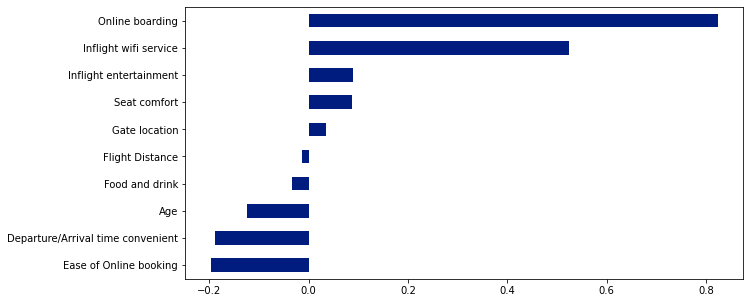

In [14]:
# MODEL

from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")
train = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
test = pd.read_csv("../input/airline-passenger-satisfaction/test.csv")
ytrain=train['satisfaction']
ytest=test['satisfaction']
train.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)
test.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)

logs=['Departure Delay in Minutes','Arrival Delay in Minutes'] #log transform due to distribution shape
for l in logs:
    train[l] = np.log(1+train[l])
    test[l] = np.log(1+test[l])
train=pd.get_dummies(train,drop_first=True) #encoding categorical variables
test =pd.get_dummies(test,drop_first=True)
ytrain=(ytrain=='satisfied').astype(int) #encoding ys
ytest=(ytest=='satisfied').astype(int)
train.drop('Arrival Delay in Minutes',axis=1,inplace=True)
test.drop('Arrival Delay in Minutes',axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
train = StandardScaler().fit_transform(train)
test = StandardScaler().fit_transform(test)
import random
from sklearn.model_selection import GridSearchCV

parameters = {'penalty':['l1','l2','elasticnet'],
          'C':[0.01,0.1,0.2,0.3,0.5,0.7,1,1.2,1.5,2,3,5,10],
             'solver':['saga']}

grid_search = GridSearchCV(estimator = LogisticRegression(),  
                       param_grid = parameters,
                       scoring = 'f1',
                       verbose = 3)

grid_search.fit(train, ytrain)
print(grid_search.best_params_)

# FINAL F1 SCORE: 0.8516424340333874

from sklearn.metrics import f1_score

f = f1_score(ytest, predictions)
print("Score", f)

# PARAMETERS USING MODEL COEFF FOR LOGREG

train = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
train.drop(['satisfaction','Unnamed: 0','id'], axis = 1, inplace = True)
train['Departure Delay in Minutes'] = np.log(1+train[l])
train = pd.get_dummies(train, drop_first = True)
train.drop('Arrival Delay in Minutes', axis = 1, inplace = True)
plt.style.use('seaborn-dark-palette')
plt.figure(figsize = (10,5))
pd.Series(model.coef_[0], index = train.columns)[:10].sort_values().plot(kind = 'barh')



In [9]:
#KNN
from sklearn.model_selection import GridSearchCV
import random
random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
params = {
    "n_neighbors" : [5,10,20,50,100,200],
    "weights" : ['uniform','distance'],
}
clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring='f1',verbose=3)
clf.fit(train,ytrain)
clf.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.909 total time=  33.4s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.910 total time=  35.8s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.909 total time=  37.0s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.911 total time=  37.7s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.916 total time=  37.1s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.909 total time=  32.9s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.910 total time=  35.8s
[CV 1/5] END ...n_neighbors=10, weights=uniform;, score=0.905 total time=  33.9s
[CV 2/5] END ...n_neighbors=10, weights=uniform;, score=0.904 total time=  36.3s
[CV 3/5] END ...n_neighbors=10, weights=uniform;, score=0.906 total time=  37.4s
[CV 4/5] END ...n_neighbors=10, weights=uniform;, score=0.907 total time=  38.0s
[CV 5/5] END ...n_neighbors=10, weights=uniform;

{'n_neighbors': 10, 'weights': 'distance'}

In [12]:
model = KNeighborsClassifier(n_neighbors=10, weights='distance')
model.fit(train, ytrain)
y_pred = model.predict(test)
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14573
           1       0.95      0.88      0.91     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [18]:
model = LogisticRegression(C=0.01, penalty= 'l1',solver= 'saga')
model.fit(train, ytrain)
y_pred = model.predict(test)
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [17]:
#condensed preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
train = pd.read_csv("../input/airline-passenger-satisfaction/train.csv")
test = pd.read_csv("../input/airline-passenger-satisfaction/test.csv")
import seaborn as sns
import matplotlib.pyplot as plt
ytrain=train['satisfaction']
ytest=test['satisfaction']
train.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)
test.drop(['satisfaction','Unnamed: 0','id'],axis=1,inplace=True)

logs=['Departure Delay in Minutes','Arrival Delay in Minutes'] #log transform due to distribution shape
for l in logs:
    train[l] = np.log(1+train[l])
    test[l] = np.log(1+test[l])
train=pd.get_dummies(train,drop_first=True) #encoding categorical variables
test =pd.get_dummies(test,drop_first=True)
ytrain=(ytrain=='satisfied').astype(int) #encoding ys
ytest=(ytest=='satisfied').astype(int)
train.drop('Arrival Delay in Minutes',axis=1,inplace=True)
test.drop('Arrival Delay in Minutes',axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
train = StandardScaler().fit_transform(train)
test = StandardScaler().fit_transform(test)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
import random
random.seed(42)
names = [
    "LR",
    "KNN",
    "DTree",
    "RF",
    "ADA"
]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=10, weights='distance'),
    DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, splitter = 'random'),
    RandomForestClassifier(random_state=42, max_depth= 80, n_estimators=300, max_features=3),
    AdaBoostClassifier(base_estimator=RandomForestClassifier(),learning_rate=0.5,n_estimators=200)
]

train = StandardScaler().fit_transform(train)
test = StandardScaler().fit_transform(test)

LR 0.3377654552459717


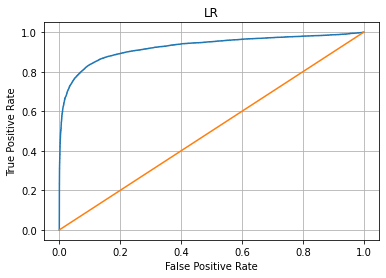

KNN 56.30185294151306


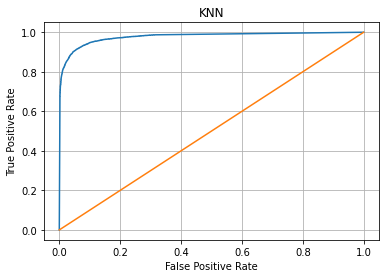

DTree 0.3036463260650635


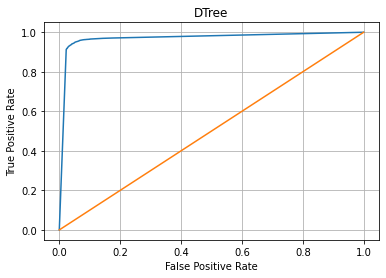

RF 33.46172094345093


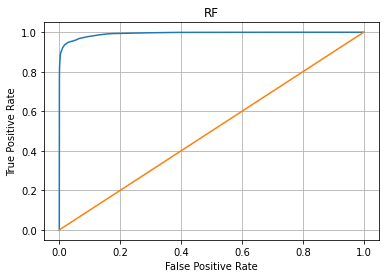

ADA 46.038541078567505


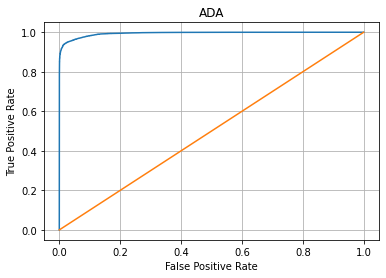

In [7]:
import time
for i,c in enumerate(classifiers): #roc curves from https://www.statology.org/plot-roc-curve-python/
    t = time.time()
    c.fit(train,ytrain)
    y_pred_proba=c.predict_proba(test)[::,1]
    print(names[i],time.time()-t)
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
    plt.figure()
    #create ROC curve
    plt.plot(fpr,tpr)
    line = np.linspace(0,1,100)
    plt.plot(line,line)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid()
    plt.title(names[i])
    plt.show() #0,0,37,17